# Scikit-learn for Regression

[Resource](https://harvard-iacs.github.io/2018-CS109A/labs/lab-3/solutions/)



In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)
import seaborn as sns

# Simple Linear Regression

I'm pretty certain I already did this at an earlier point, but oh well. I need to redo it to follow along for the project. UGH!

We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations. Each observation consists of one predictor xi and one response yi for i = 1, 2, 3.

Blah blah blah insert some stuff about reshaping (where the hell did my original follow along for this go?).

Now here's some basic plotting examples:

(3,) (3,)


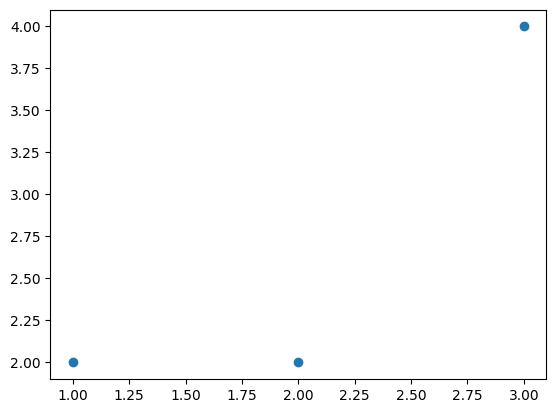

In [2]:
# make a simple scatterplot
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

And here's a "nice" scatterplot:

<Axes: title={'center': 'hello nice plot'}, xlabel='$x$', ylabel='$y$'>

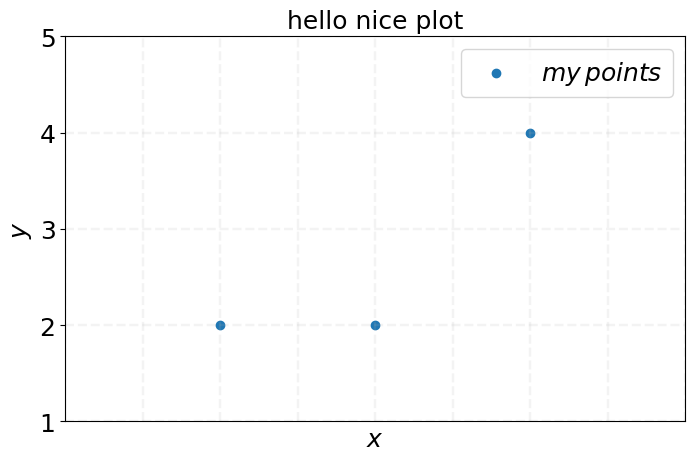

In [3]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'hello nice plot')

Then they go over a bunch of stuff you already know about the linear regression formula then build a model from scratch (waste of time. We're not doing that again).

# Building a model with statsmodels and sklearn

For the purposes of this lab, statsmodels and sklearn do the same thing. More generally though, statsmodels tends to be easier for inference [finding the values of the slope and intercept and dicussing uncertainty in those values], whereas sklearn has machine-learning algorithms and is better for prediction [guessing y values for a given x value]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

In [5]:
import statsmodels.api as sm

In [12]:
x_train = np.array([[1, 2, 3]]).T
X = sm.add_constant(x_train)
print(X)

toyregr_sm = sm.OLS(y_train, X)
results_sm = toyregr_sm.fit()

beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f"Slope: {beta1_sm:.2f}\nIntercept: {beta0_sm:.2f}")

[[1. 1.]
 [1. 2.]
 [1. 3.]]
Slope: 1.00
Intercept: 0.67


And here's the summary that you're oh so familiar with:

In [14]:
import warnings
warnings.filterwarnings("ignore")

print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.333
Time:                        13:24:06   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

Now here's the `sklearn` way:

In [17]:
from sklearn import linear_model

toyregr = linear_model.LinearRegression()

results = toyregr.fit(x_train, y_train)

beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print(f"Slope: {beta1_skl:.2f}\nIntercept: {beta0_skl:.2f}")

Slope: 1.00
Intercept: 0.67


## The shape of things in scikit-learn

